# Qiskit Tutorialを触る
Ref. -> [Tutorial](https://qiskit.org/documentation/intro_tutorial1.html)
---

## install qiskit to Colaboratory
---

In [ ]:
# Ready to use Qiskit (for Google Colab)
!pip install qiskit pylatexenc

## import package
---

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## initialize variables
---
define two Qubits and two ClassicalBits

Qbits : $|00\rangle$


In [3]:
circuit = QuantumCircuit(2, 2)


## add gates
---
make Bell circuit.  
$B(|00\rangle) = (|00\rangle + |11\rangle)\frac{1}{\sqrt{2}}$

1. add Hadamard gate to q0.   
$H(|0\rangle)|0\rangle = \displaystyle \left((|0\rangle + |1\rangle)\frac{1}{\sqrt{2}}\right)|0\rangle$
2. add CNOT gate q0, q1.   
$\mathrm{CNOT}( H(|0\rangle) + |0\rangle)$  
$\displaystyle = \left((|0\rangle + |1)\rangle\frac{1}{\sqrt{2}}\right)|0\rangle$  
$\displaystyle = (|00\rangle + |11\rangle)\frac{1}{\sqrt{2}}$

3. measure qbit to classical bit.

In [ ]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

## visualize the circuit
---

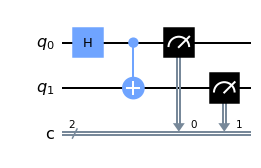

In [5]:
# change output for mpl (need pylatexenc)
circuit.draw(output='mpl')

## simulation
---

In [6]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(f"Total count for 00 and 11: {counts}")

Total count for 00 and 11: {'00': 508, '11': 492}


## visualize result
---

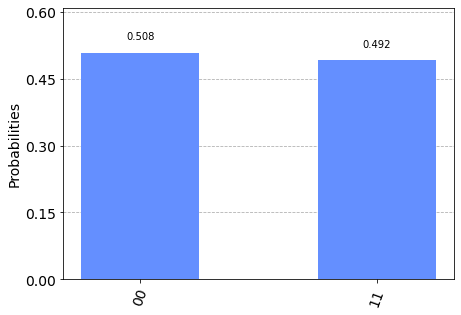

In [7]:
plot_histogram(counts)